In [130]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [131]:
start = np.random.randint(3,size=1)[0]
num_time_steps = 100
start,num_time_steps

(2, 100)

In [132]:
time_steps = np.linspace(start,start+10,num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1)

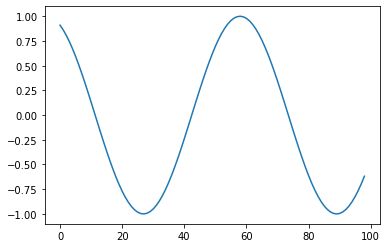

In [133]:
plt.plot(np.ravel(x.numpy()))

In [143]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.01

class Net(nn.Module):
    def __init__(self,):
        super(Net,self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size # 1
            ,hidden_size = hidden_size #10
            ,num_layers = 1
            ,batch_first = True #[b,seq,feature]
        )
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
        self.linear = nn.Linear(hidden_size,output_size) # AC: hidden_size => out_size | Chinge: dim == [n,1]
    
    def forward(self,x, hidden_prev):
        out ,hidden_prev = self.rnn(x,hidden_prev)
        #[1,seq,h]=>[seq,h]
        out = out.view(-1,hidden_size) #
        out = self.linear(out) # [seq,h] => [seq ,1]
        out = out.unsqueeze(dim = 0) #[1,seq,1]  because wewil be input it to MSE function ,so drop  it to one dim dim
        return out , hidden_prev


model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr)
hidden_prev = torch.zeros(1,1,hidden_size)# [b,1,hidden_size=10]

for iter in range(6000):
    start = np.random.randint(10,size = 10)[0]
    num_time_steps = 100
    time_steps = np.linspace(start,start+10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1)

    output , hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()

    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    if iter % 100 == 0:
        print("Iteration:{} loss {}".format(iter,loss.item()))


Iteration:0 loss 0.5456202626228333
Iteration:100 loss 0.0013656971277669072
Iteration:200 loss 0.0011224953923374414
Iteration:300 loss 0.0012355652870610356
Iteration:400 loss 0.0016698800027370453
Iteration:500 loss 0.001987932249903679
Iteration:600 loss 0.0024482726585119963
Iteration:700 loss 0.00033708460978232324
Iteration:800 loss 0.0003786404267884791
Iteration:900 loss 0.0016816452844068408
Iteration:1000 loss 0.0003419649146962911
Iteration:1100 loss 0.0005931905470788479
Iteration:1200 loss 0.0021306704729795456
Iteration:1300 loss 0.000579767394810915
Iteration:1400 loss 0.00015682824596296996
Iteration:1500 loss 0.0005843951948918402
Iteration:1600 loss 0.0016220909310504794
Iteration:1700 loss 0.0003479860897641629
Iteration:1800 loss 0.0020476803183555603
Iteration:1900 loss 0.0005220812745392323
Iteration:2000 loss 0.00013598098303191364
Iteration:2100 loss 0.0012242872035130858
Iteration:2200 loss 0.0015321228420361876
Iteration:2300 loss 0.0008506872109137475
Iterat

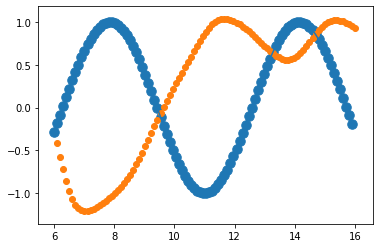

In [142]:
hidden_prev = torch.zeros(1,1,hidden_size)# [b,1,hidden_size=10]
time_steps = np.linspace(start,start+10,num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1)

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])

x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()
